___
<h1> Machine Learning </h1>
<h2> Systems Engineering and Computer Technologies / Engenharia de Sistemas e Tecnologias Informáticas
(LESTI)</h2>
<h3> Instituto Superior de Engenharia / Universidade do Algarve </h3>

[LESTI](https://ise.ualg.pt/curso/1941) / [ISE](https://ise.ualg.pt) / [UAlg](https://www.ualg.pt)

Pedro J. S. Cardoso (pcardoso@ualg.pt)

___

# $k$-Nearest Neighbors (kNN): Classification

In [16]:
# install mglearn package (if not installed)
# !pip install mglearn

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn.plots
from mglearn.datasets import make_wave
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import numpy as np

np.random.seed(1)

 ## Nearest Neighbors Classification

The $k$-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”

the `sklearn.neighbors.KNeighborsClassifier`Classifier implementing the $k$-nearest neighbors vote.

### Making it with some forged data

Function make_forge generates some (deterministic) data

In [6]:
X, y = mglearn.datasets.make_forge()
X.shape

(26, 2)

In [7]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

As usual, the next step is to build the training and testing sets

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

and "train" the model

In [9]:
knc = KNeighborsClassifier(n_neighbors=3).fit(x_train, y_train)

prediction are made using the `predict` method (predict the class labels for the provided data)

In [10]:
print(x_test)
knc.predict(x_test)

[[ 8.7337095   2.49162431]
 [ 8.92229526 -0.63993225]
 [ 8.18378052  1.29564214]
 [ 8.69289001  1.54322016]
 [ 8.34468785  1.63824349]
 [ 9.17748385  5.09283177]
 [ 9.32298256  5.09840649]]


array([0, 0, 0, 0, 0, 1, 1])

The real values are in the `y_test` vector

In [11]:
y_test

array([0, 0, 0, 0, 0, 1, 1])

The `score` methods allows to score(!) the classifier. The method returns the mean accuracy on the given test data and labels, so 1 is good!

In [12]:
knc.score(x_test, y_test)

1.0

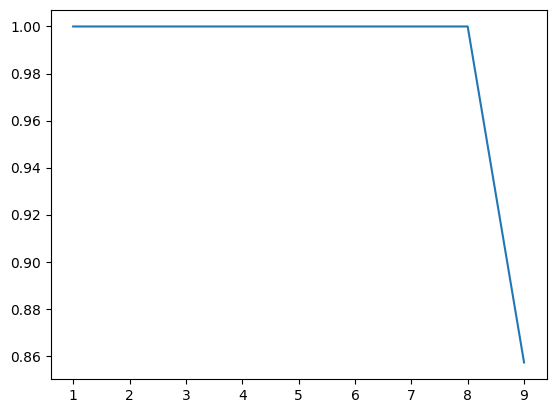

In [13]:
ks = list(range(1, 10))
score = []
for n_neighbors in ks:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x_train, y_train)
    score.append(clf.score(x_test, y_test))

plt.plot(ks, score)   

Let us see how was data separeted

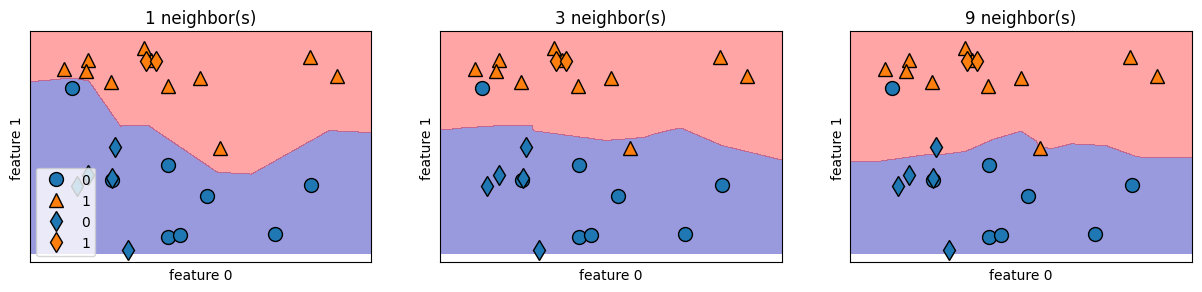

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x_train, y_train)
    mglearn.plots.plot_2d_separator(clf, x_train, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train, ax=ax)
    mglearn.discrete_scatter(x_test[:, 0], x_test[:, 1], y_test, ax=ax, markers='d')
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
plt.show()

`predict_proba` returns probability estimates for the test data X.

In [15]:
knc.predict_proba(x_test)

array([[0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])